## CS342 Machine Learning

### Department of Computer Science, University of Warwick

## Lab 4

## PCA for dimensionality reduction and  face recognition

Recall that Principal Component Analysis (PCA) is a linear feature transformation technique that allows finding a new basis **Z** where a sample **x**$_{i}$ can be represented as a combination of basic parts, or principal components (PCs). Each **z**$_{i}$ in matrix **Z** is the new feature representation of **x**$_{i}$. If the dimensions of **z**$_{i}$ are less than those of **x**$_{i}$, PCA provides  dimensionality reduction. Hence, PCA can improve and speed up classification and regression tasks.

In Lab 4, we will explore PCA on imaging data. Specifically, we will use the face images contained in the _Labeled Faces in the Wild_ (LFW) dataset for classification after applying PCA. The PCs computed from face images are called **Eigenfaces**.

The LFW dataset contains grey-level face images of famous people. All images are resized to the the specific size $47 \times 62$ pixels. For more information about the dataset, please check this link: http://vis-www.cs.umass.edu/lfw/

# You can download the data files needed for this lab as follows:

1. Read the 'Getting Started' file on the module webpage and follow the instructions to create the folders needed for this module: https://warwick.ac.uk/fac/sci/dcs/teaching/material/cs342/


2. Change to the directory lab4 by using the command:

``` cd cs342/lab4 ```

3. Copy the compressed file for this lab to the lab4 directory using the following command:

``` cp /modules/cs342/2019/lab4_data.tar.gz .```

5. UnTar the _lab4_data.tar.gz_ file using the command:

```tar xvzf lab4_data.tar.gz```

6. After uncompressing the file, the directory structure should look like this (recall to store this Jupyter file in the cs342/lab4 directory):
```
.
├── data
│   ├── X.npy
│   └── Y.npy
├── lab4_data.tar.gz
└── Lab-4.ipynb
```

## 1. Use the code below to upload the LFW dataset and to split it into a training dataset and a test dataset:

a. Recall that when working with images, they should be converted from matrices to feature vectors.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL 
from sklearn.model_selection import train_test_split


# Load all the images
X = np.load("./data/X.npy")
y = np.load("./data/Y.npy")

# Display the number of samples
print ("Total number of images: ",X.shape[0])

#Reshape the first image
first_image = X[0].reshape(62,47)
h , w = first_image.shape

# Display the width and height of each image
print ("Image HEIGHT: ",h)
print ("Image WIDTH: ",w)

target_names = ['Colin Powell','Donald Rumsfeld','George W Bush','Gerhard Schroeder','Tony Blair']

# Display the classes available in the dataset
print ("Classes : %d" % len(target_names),target_names)

# Split all data (X) into a training and testing datasets. The test dataset contains 30% of all data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n, d = X_train.shape
print ("Number of images in the training dataset: ",n)
print ("Dimensions of feature vectors in the training dataset: ",d)
n, d = X_test.shape
print ("Number of images in the test dataset: ",n)
print ("Dimensions of feature vectors in the test dataset: ",d)

plt.imshow(first_image, cmap='bone')
plt.title("FIRST Training Image")
plt.show()


Total number of images:  1140
Image HEIGHT:  62
Image WIDTH:  47
Classes : 5 ['Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder', 'Tony Blair']
Number of images in the training dataset:  798
Dimensions of feature vectors in the training dataset:  2914
Number of images in the test dataset:  342
Dimensions of feature vectors in the test dataset:  2914


<Figure size 640x480 with 1 Axes>

## 2. Write code to display a number of training images (10 marks):

a. Each **figure** should be displayed with a size of 12 X 12. Hint: use parameter _figsize(12,12)_.

b. Use the _add_subplot_ command to display the first 15 training images in a grid of 3 rows X 5 columns.

b. Use the 'bone' colour map to display the images.

c. Display the label of each image at the top of the image. Hint: use the _set_title_ command.


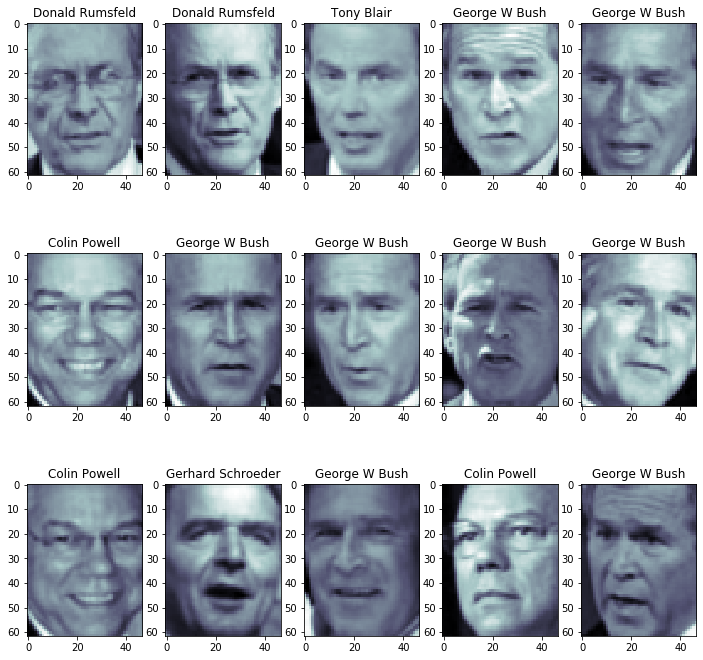

In [2]:
nb_im = 15
fig = plt.figure(figsize=(12,12))

for i in range(len(X_train)):
    if i < nb_im:
        axe = fig.add_subplot(3,5,i+1)
        axe.set_title(target_names[y_train[i]])
        plt.imshow(X_train[i].reshape(62,47),cmap='bone')

plt.show()

## 3. Write a function that computes the PCA of a dataset using Singular Value Decomposition (SVD) (15 marks):

a. Recall that SVD computes three matrices for an input matrix **X**: **U**, **S** and **V**. 

b. Your function should use as arguments the dataset to be transformed and the number of top PCs to be used.

c. Recall to centre the data before computing its SVD.

d. The function should return the top PCs to be used, the mean of the dataset and the centred dataset.

d. The function should also display the total number of PCs found in the data.

Hint: use the _numpy.linalg.svd_ implementation of SVD with _full_matrices=True_. **Note:** this implementation produces a matrix **V** where each row is a PC. 

In [3]:
def comp_PCA (d_set, nb_PC):
    
    
    dt_mean = np.mean(d_set)
    means = np.array([])
    X_cnt = d_set.copy()
    T_PC = []
    num_col = len(d_set[0])
    
    
    for i in range(num_col):
        
        mean = np.mean(d_set[:,i])
        means = np.append(means , mean)
        
        for j in range(len(d_set)):
            X_cnt[j][i] = d_set[j][i] - mean
    
    u, s, v = np.linalg.svd(X_cnt, full_matrices=True)
    
    
    
    if nb_PC < len(v):
        
        for i in range(nb_PC):
            
            T_PC.append(v[i])
    else:
        
        print('There are not enough PCs for the number of top PCs asked for.')
    
  
    return dt_mean, X_cnt, T_PC, means, v



dt_mean, X_cnt, T_PC, means, v = comp_PCA(X_train, 2)
print('The total number of PCs is' ,len(v.transpose()))
print(dt_mean, X_cnt, T_PC)

The total number of PCs is 2914
133.2305 [[ 42.309944  49.215126  50.266914 ...  87.79323  107.14411  121.08354 ]
 [-16.023392 -20.11821  -31.733086 ... -92.5401   -78.85589  -65.24979 ]
 [-17.35672  -20.784874 -29.066422 ... 109.4599   123.81078  126.08354 ]
 ...
 [-30.356724 -37.118206 -55.066418 ... 103.12657    8.144112 -63.58312 ]
 [ 18.64328   26.548462  22.933578 ... -79.5401   -70.85589  -62.249786]
 [ 22.976608  22.548462  34.933586 ... -58.873432 -90.85589  -82.91645 ]] [array([-0.0012729 , -0.00196736, -0.00284503, ..., -0.01132332,
       -0.00969622, -0.0084892 ], dtype=float32), array([-0.01781761, -0.01659123, -0.01704029, ...,  0.03012431,
        0.02942146,  0.02838574], dtype=float32)]


## 4. Display the mean image and a number of top PCs as computed using your function in 3 on the training data (5 marks):

a. Display first the mean image of the training data with the appropriate label at the top of the image.

b. Use the _add_subplot_ command to display the top 15 PCs of the training data in a grid of 3 rows X 5 columns. Recall that matrix **V** contains the PCs as the rows of the matrix. The first row corresponds to the top PC.

c. Each PC should be displayed with a **figure** size of 12 X 12.

d. Use the 'bone' colour map to display the top 15 PCs.

e. Display the component number at the top of each PC.

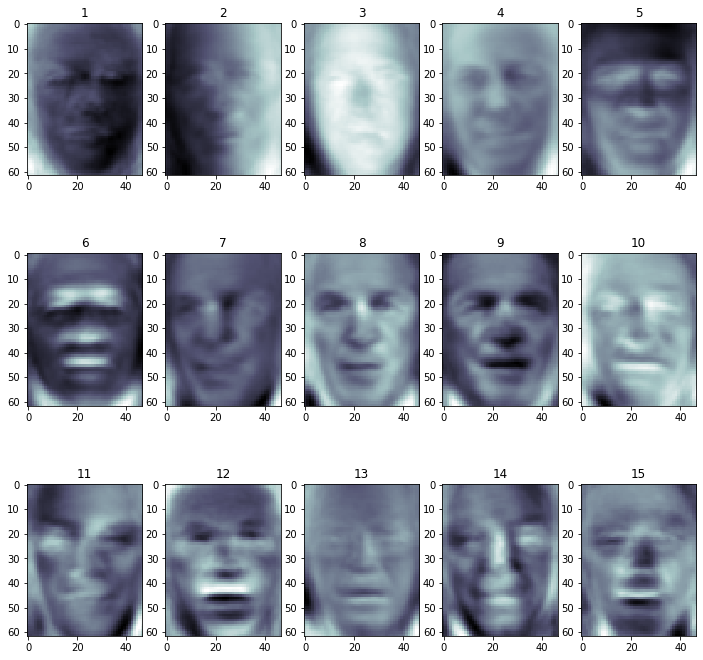

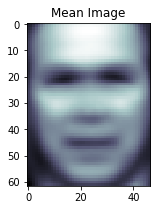

In [4]:
dt_mean, X_cnt, T_PC, means,v = comp_PCA (X_train, 15)

fig = plt.figure(figsize=(12,12))

for i in range(len(T_PC)):
    
    axes = fig.add_subplot(3,5,i+1)
    axes.set_title(i+1)
    plt.imshow(T_PC[i].reshape(62,47),cmap='bone')
plt.show()


fig1 = plt.figure(figsize=(3,3))
img = fig1.add_subplot(1,1,1)
img.set_title('Mean Image')
plt.imshow(means.reshape(62,47),cmap='bone')

plt.show()

# 5. Use the results of the function in 3 to transform the test images using a number of top PCs  (20 marks):

a. Recall to centre the data before transformation by using the mean  of the training data. 

b. Transform the test dataset by using the top {100,50,10,2} PCs of the training data.

c. Plot the top 2 PCs of the test data in a 2D scatter plot (use the _scatter_ implementation), assigning a distinct colour to each class. The _x_-axis should be the first PC, while the _y_-axis should be the second PC. Hint: you may use _np.unique_ to choose the unique labels and _np.where_ to choose the transformed samples based on their labels.

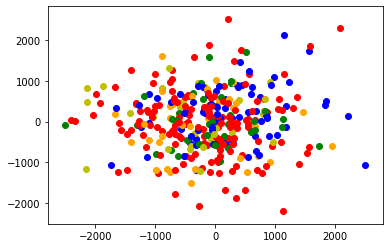

In [5]:
def Transform (Train_set, Test_set):
    
    dt_mean, X_cnt, T_PC, means, v = comp_PCA(Test_set, 2)
    
    dt_mean_train, X_cnt_train, T_PC_total, means_train, v_train = comp_PCA(Train_set, 2913)
    dt_mean_train, X_cnt_train, T_PC100, means_train, v_train = comp_PCA(Train_set, 100)
    dt_mean_train, X_cnt_train, T_PC50, means_train, v_train = comp_PCA(Train_set, 50)
    dt_mean_train, X_cnt_train, T_PC10, means_train, v_train = comp_PCA(Train_set, 10)
    dt_mean_train, X_cnt_train, T_PC2, means_train, v_train = comp_PCA(Train_set, 2)
    
    X = Test_set - dt_mean_train
    
    PC = np.array(T_PC_total)
    PC100 = np.array(T_PC100)
    PC50 = np.array(T_PC50)
    PC10 = np.array(T_PC10)
    PC2 = np.array(T_PC2)
    
    W = PC.transpose()
    W100 = PC100.transpose()
    W50 = PC50.transpose()
    W10 = PC10.transpose()
    W2 = PC2.transpose()
    
    z = np.matmul(X, W)
    z100 = np.matmul(X, W100)
    z50 = np.matmul(X, W50)
    z10 = np.matmul(X, W10)
    z2 = np.matmul(X, W2)
    
    return z100, z50, z10, z2, z

z2 = Transform(X_train, X_test)[3]

for i in range(0,342):
        if y_test[i] == 0:
            plt.scatter(z2[i,0],z2[i,1], color='b')
        elif y_test[i] == 1:
            plt.scatter(z2[i,0],z2[i,1], color='g')
        elif y_test[i] == 2:
            plt.scatter(z2[i,0],z2[i,1], color='r')
        elif y_test[i] == 3:
            plt.scatter(z2[i,0],z2[i,1], color='y')
        elif y_test[i] == 4:
            plt.scatter(z2[i,0],z2[i,1], color='orange')
    
plt.show()

## 6. Reconstruct the transformed images and display them (20 marks):

a. Reconstruct all transformed images in 5 (for the top {100,50,10,2} PCs.

b. Display 15 reconstructed images in a grid of 4 rows X 5 columns with a **figure** size of 12 X 12. Row 1 should display images reconstructed after transformation using the top 100 PCs, the second row should display images reconstructed after transformation using the top 50 PCs, row 3 should display images reconstructed after transformation using the top 10 PCs, and row 4 should display images reconstructed after transformation using the top 2 PCs.

c. Use the 'bone' colour map to display the reconstructed images.

d. Display the label of each reconstructed image at the top of the image. 

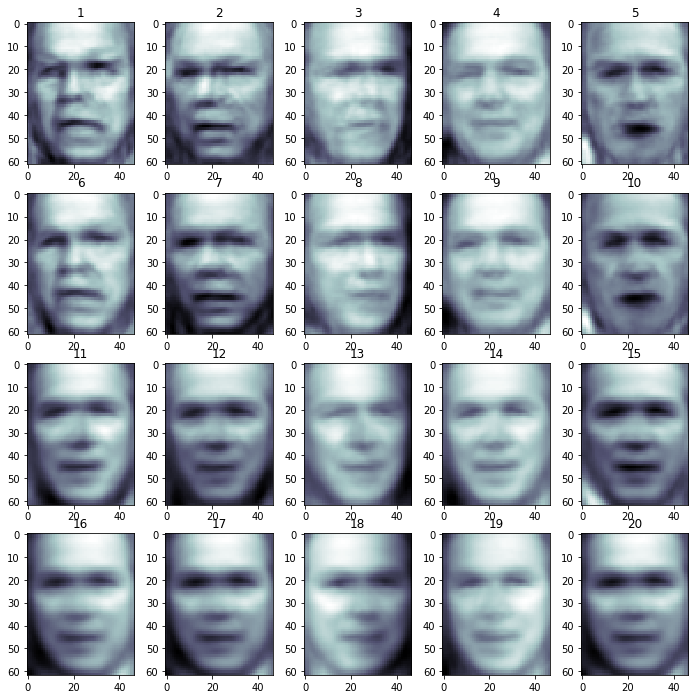

In [6]:
def Reconstruction():
    
    PC2 = np.array(comp_PCA(X_train, 2)[2])
    PC10 = np.array(comp_PCA(X_train, 10)[2])
    PC50 = np.array(comp_PCA(X_train, 50)[2])
    PC100 = np.array(comp_PCA(X_train, 100)[2])
    
    z100, z50, z10, z2, z = Transform (X_train, X_test)
    
    res2 = np.matmul(z2,PC2) + X_train.mean(0)
    res10 = np.matmul(z10,PC10) + X_train.mean(0)
    res50 = np.matmul(z50,PC50) + X_train.mean(0)
    res100 = np.matmul(z100,PC100) + X_train.mean(0) 
    
    
    
    return res2, res10, res50, res100
    
    
res2, res10, res50, res100 = Reconstruction()

fig = plt.figure(figsize=(12,12))
                                   
for i in range(0,20):
        
    photo = fig.add_subplot(4,5,i+1)
    photo.set_title(i+1)
        
    if 0<=i<=4:
        plt.imshow(res100[i].reshape(62,47),cmap='bone')
    elif 5<=i<=9:
        plt.imshow(res50[i-5].reshape(62,47),cmap='bone')
    elif 10<=i<=14:
        plt.imshow(res10[i-10].reshape(62,47),cmap='bone')
    elif 15<=i<=20:
        plt.imshow(res2[i-15].reshape(62,47),cmap='bone')
    
plt.show()

## 7. Compute the Mean Squared Error (MSE) between all the reconstructed images in 6 and the original test images (10 marks):

a. The MSE should be computed for the four cases in 6; i.e., reconstruction after transformation using the top {100,50,10,2} PCs. Recall that the MSE measures the average of the squared errors, i.e., the average squared difference between the reconstructed images and the original images. 

b. Make sure to clearly display the case that achieves the lowest reconstruction error.


In [7]:
def MSE():
    
    
    res2, res10, res50, res100 = Reconstruction()
    
    mse2 = (((res2 - X_test)**2).mean(0))/(2914*342)
    mse10 = (((res10 - X_test)**2).mean(0))/(2914*342)
    mse50 = (((res50 - X_test)**2).mean(0))/(2914*342)
    mse100 = (((res100 - X_test)**2).mean(0))/(2914*342)
        
    min_error = [1,2,3]
    
    min_error[0] = mse100[0]
    min_error[1] = "Top 100 PCs"
    min_error[2] = 1
    
    for i in range(1,20):
        if 0<=i<=4:
            if mse100[i] < min_error[0]:
                min_error[0] = mse100[i]
                min_error[1] = "Top 100 PCs"
                min_error[2] = i+1
        elif 5<=i<=9:
            if mse50[i] < min_error[0]:
                min_error[0] = mse50[i]
                min_error[1] = "Top 50 PCs"
                min_error[2] = i+1
        elif 10<=i<=14:
            if mse10[i] < min_error[0]:
                min_error[0] = mse10[i]
                min_error[1] = "Top 10 PCs"
                min_error[2] = i+1
        elif 15<=i<=20:
            if mse2[i] < min_error[0]:
                min_error[0] = mse2[i]
                min_error[1] = "Top 2 PCs"
                min_error[2] = i+1
        
    
    return print("The lowest reconstruction error is ", min_error[0], " from image ", min_error[2], " using the ", min_error[1])
MSE()    

The lowest reconstruction error is  0.0004209743895193839  from image  5  using the  Top 100 PCs


## 8. Use K-NN classification to classify the transformed test images (15 marks):

a. Classification should  done for the four cases in 5; i.e., transformed test images using the top {100,50,10,2} PCs. Use K=5 for K-NN classification.

b. Recall that your K-NN classifier should be trained by using the corresponding transformed training dataset. For example, to classify test images transformed using the top 100 PCs, the K-NN classifier should use the training dataset after transformation using the top 100 PCs.

c. Compute the accuracy of your classifier using the accuracy metric defined in Lab 3. 

d. Compute the time needed to perform the classification for each case. Hint: Import the _time_ library and use _time.time()_ to get the start and end times of each classification case.

e. Make sure to clearly display the case that achieves the highest accuracy and that takes the shortest time.

In [8]:
from sklearn.neighbors import KNeighborsClassifier as KNC
import time

def accu(l1, l2):
    TP = 0
    TN = 0
    for i in range(len(l1)):
        if l1[i] == l2[i]:
            TP+=1
        else: 
            TN+=1
    accu = TP/(TP+TN)
    return accu

def Knn (k):

    train_z100, train_z50, train_z10, train_z2, z = Transform(X_train, X_train)
    test_z100, test_z50, test_z10, test_z2, tz = Transform(X_train, X_test)
    
    timing = time.time()
    neigh = KNC(n_neighbors=k)
    
    neigh.fit(train_z2, y_train)
    y2 = neigh.predict(test_z2)
    t2 = time.time() - timing
    ac2 = accu(y2,y_test)

    
    neigh.fit(train_z10, y_train)
    y10 = neigh.predict(test_z10)
    t10 = time.time() - timing
    ac10 = accu(y10,y_test)

    
    neigh.fit(train_z50, y_train)
    y50 = neigh.predict(test_z50)
    t50 = time.time() - timing
    ac50 = accu(y50,y_test)

    
    neigh.fit(train_z100, y_train)
    y100 = neigh.predict(test_z100)
    t100 = time.time() - timing
    ac100 = accu(y100,y_test)

    
    best_ac = max([ac2,ac10,ac50,ac100])
    best_time = min([t2,t10,t50,t100])
    
    if best_ac == ac2:
        print('The case with the best accuracy is the case with Top 2 PCs with an accuracy of: ', ac2)
        
    elif best_ac == ac10:
        print('The case with the best accuracy is the case with Top 10 PCs with an accuracy of: ', ac10)
        
    elif best_ac == ac50:
        print('The case with the best accuracy is the case with Top 50 PCs with an accuracy of: ', ac50)
        
    elif best_ac == ac100:
        print('The case with the best accuracy is the case with Top 100 PCs with an accuracy of: ', ac100)
        
    
    if best_time == t2:
        print('The case with the best time is the case with Top 2 PCs with a time of: ', t2)
        
    elif best_time == t10:
        print('The case with the best time is the case with Top 10 PCs with a time of: ', t10)
        
    elif best_time == t50:
        print('The case with the best time is the case with Top 50 PCs with a time of: ', t50)
        
    elif best_time == t1t00:
        print('The case with the best time is the case with Top 100 PCs with a time of: ', t100)
        

        
Knn(5)

The case with the best accuracy is the case with Top 50 PCs with an accuracy of:  0.6374269005847953
The case with the best time is the case with Top 2 PCs with a time of:  0.009409666061401367


## 9. Use K-NN classification to classify the  test images in the pixel domain (5 marks):

a. Compute the accuracy of your classifier using the accuracy metric defined in Lab 3.

b. Use K=5 for K-NN classification.

c. Measure the time it takes to do the classification as in 8.

In [10]:
z_train = Transform(X_train, X_train)[4]
z_test = Transform(X_train, X_test)[4]

timing = time.time()
neigh = KNC(n_neighbors=5)
neigh.fit(z_train, y_train)
y = neigh.predict(z_test)
t = time.time() - timing
ac = accu(y,y_test)

print('With all the PCs (2914) the accuracy is ', ac, ', and it took ', t, 's to calculate it.')

With all the PCs (2914) the accuracy is  0.6198830409356725 , and it took  1.1162149906158447 s to calculate it.


## Deliverables

a. Submit your code (this Jupyter file) via Tabula on the deadline.